In [16]:
import os
from terrain_classification.svm_classification.train_svm import SVMClassification
# from terrain_classification.svm_classification.predict_svm import PredictSVM
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [18]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "terrain_classification"))
files_to_use = {
    # "sand": ["trial1.csv"],
    "sand":     ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv", "trial5.csv", "trial6.csv", "trial7.csv"],#, "trial8.csv", ],
    "concrete": ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv", "trial5.csv", "trial6.csv", "trial7.csv"],#, "trial8.csv", ],
    "gravel":   ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv", "trial5.csv", "trial6.csv", "trial7.csv"],#, "trial8.csv", ],
    "wood":   ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv", "trial5.csv", "trial6.csv", "trial7.csv"],#, "trial8.csv", ],
    "clay":   ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv", "trial5.csv", "trial6.csv", "trial7.csv"],#, "trial8.csv", ],
#     "sand": ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv"],
#     "concrete": ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv"],
#     "gravel": ["trial1.csv", "trial2.csv", "trial3.csv", "trial4.csv"],
}

data_labels = {}
for key_ in files_to_use.keys():
    for file_ in files_to_use[key_]:
        data_labels[os.path.join(parent_dir, 'data', key_, file_)] = key_

# data_labels

In [19]:
def adjust_same_length(features_, labels_):
    """
    Adjusts the length of the data arrays to be the same by padding with zeros.
    """
    unique_labels, label_counts = np.unique(labels_, return_counts=True)

    min_count = min(label_counts)
    #extract index of all unique labels
    indices = []
    for label in unique_labels:
        id_ = np.where(labels_ == label)[0]
        if len(id_) >= min_count:
            indices.extend(id_[:min_count])
        else:
            print(f"Warning: Not enough samples for label '{label}'. Found {len(id_)} samples.")
    return features_[indices], labels_[indices]

In [20]:
# Create an instance of the SVMClassification class
svm_classifier = SVMClassification(data_labels)

# Load the data
# cmp = ['x', 'y', 'z']
cmp = ['x', 'z']
# cmp = ['z']
aug_data = True
augment_types = ['add_noise', 'add_noise', 'time_shift',]
params = [0.1, 0.01, 25,]
# augment_types = ['add_noise', 'signal_inversion']
# params = [0.1, ""]

norm_data = True
svm_classifier.create_feature_matrix_and_label(normalize_data=norm_data,
                            legs=['fl', 'fr', 'rl', 'rr'], 
                            components=cmp,
                            combine_components=True, 
                            augment_data=aug_data,
                            data_padding_size=70,
                            augmetation_types=augment_types,
                            augment_params=params,)

svm_classifier.feature_matrix, svm_classifier.labels = adjust_same_length(svm_classifier.feature_matrix, svm_classifier.labels)

unique_labels, label_counts = np.unique(svm_classifier.labels, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} samples")

print(f"ratio {max(label_counts)/min(label_counts)}")
print(f"feature matrix shape: {svm_classifier.feature_matrix.shape}")
print(f"labels shape: {svm_classifier.labels.shape}")
print(f"original data shape: {np.array(svm_classifier.original_data).shape}")

Label clay: 1928 samples
Label concrete: 1928 samples
Label gravel: 1928 samples
Label sand: 1928 samples
Label wood: 1928 samples
ratio 1.0
feature matrix shape: (9640, 560)
labels shape: (9640,)
original data shape: (10224, 140)


In [21]:
def convert_labels(labels):
    # Convert string labels to integers
    label_map = {}
    label_map['sand'] = 0
    label_map['gravel'] = 1
    label_map['concrete'] = 2
    label_map['clay'] = 3
    label_map['wood'] = 4
    return np.array([label_map[label] for label in labels], dtype=int)

In [22]:
#use miniconda python 3.12
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(svm_classifier.feature_matrix, svm_classifier.labels, test_size=0.2, random_state=42)
# new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_features, new_labels, test_size=0.2, random_state=42)
# print(f"X type {new_X_train.dtype}")
# print(f"y type {new_y_train.dtype}")
orig_label_train = new_y_train
orig_label_test = new_y_test
new_y_train = convert_labels(new_y_train)
new_y_test = convert_labels(new_y_test)

scaler = StandardScaler()
new_X_train = scaler.fit_transform(new_X_train)
new_X_test = scaler.transform(new_X_test)


Trying c: 1000 g: scale kernel: rbf -> Accuracy score: 0.7204
Trying c: 1000 g: 0.001 kernel: rbf -> Accuracy score: 0.6992
Trying c: 1000 g: 0.01 kernel: rbf -> Accuracy score: 0.6094
Trying c: 1000 g: 0.1 kernel: rbf -> Accuracy score: 0.5088
Trying c: 1000 g: 1 kernel: rbf -> Accuracy score: 0.3107
----------------------
Trying c: 10 g: scale kernel: rbf -> Accuracy score: 0.7116
Trying c: 10 g: 0.001 kernel: rbf -> Accuracy score: 0.6680
Trying c: 10 g: 0.01 kernel: rbf -> Accuracy score: 0.6094
Trying c: 10 g: 0.1 kernel: rbf -> Accuracy score: 0.5088
Trying c: 10 g: 1 kernel: rbf -> Accuracy score: 0.3107
----------------------
Trying c: 100 g: scale kernel: rbf -> Accuracy score: 0.7204
Trying c: 100 g: 0.001 kernel: rbf -> Accuracy score: 0.7012
Trying c: 100 g: 0.01 kernel: rbf -> Accuracy score: 0.6094
Trying c: 100 g: 0.1 kernel: rbf -> Accuracy score: 0.5088
Trying c: 100 g: 1 kernel: rbf -> Accuracy score: 0.3107
----------------------
Trying c: 0.1 g: scale kernel: rbf ->

/home/isaac/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/isaac/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/isaac/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


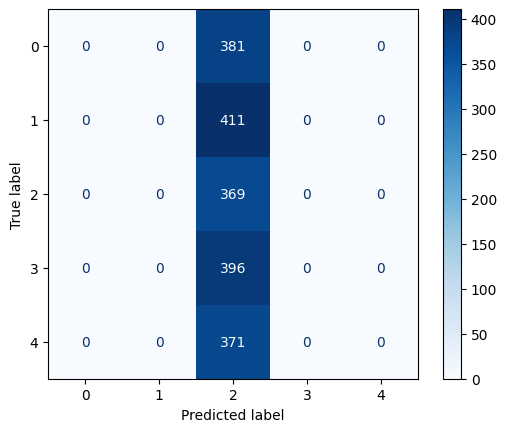

In [23]:

from cuml.svm import SVC as cmSVC
from cuml.metrics import accuracy_score
from cuml.svm import LinearSVC as cmLinearSVC

# print("Creating SVC model")
# c = [0.1, 1, 10, 100]
c = [1000, 10, 100, 0.1]
g = ['scale', 0.001, 0.01, 0.1, 1]
# c = [1, 1e1, 1e2]
# g = [0.1, 1, 10]
# g = ['scale', 'auto']
# g = [0.01, 1]
# c = [1000]
# g = ['scale']
kernel = ['rbf']
# kernel = ['rbf', 'poly', 'sigmoid']
good_model = None
best_acc = 0
# for c_, g_ in zip(c, g):
for k_ in kernel:
    for c_ in c:
        for g_ in g:
        # print(f"Trying c: {c_} g: {g_}")
        # print(f"accuracy {accuracy_score(new_y_pred, new_y_test)}")
            if k_ == 'linear':
                # print("Using LinearSVC")
                new_svc = cmLinearSVC(C=c_, max_iter=10000)
            else:
                new_svc = cmSVC(kernel=k_, C=c_, gamma=g_, cache_size=2000)

            new_svc.fit(new_X_train, new_y_train)
            new_y_pred = new_svc.predict(new_X_test)
            acc_ = accuracy_score(new_y_pred, new_y_test)
            if acc_ > best_acc:
                best_acc = acc_
                good_model = new_svc

            print(f"Trying c: {c_} g: {g_} kernel: {k_} -> Accuracy score: {acc_:.4f}") 
            # print(classification_report(new_y_test, new_y_pred))
            # print("=========================")
        print("----------------------")
    print("----------------------")
print(f"Best accuracy: {best_acc}")
print(f"classification report:\n{classification_report(new_y_test, new_y_pred)}")
ConfusionMatrixDisplay.from_predictions(new_y_test, new_y_pred, display_labels=good_model.classes_,cmap='Blues')
print("All Done")

classifification report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64        74
           1       0.48      0.55      0.52        74
           2       0.47      0.50      0.48        74

    accuracy                           0.54       222
   macro avg       0.56      0.54      0.55       222
weighted avg       0.56      0.54      0.55       222



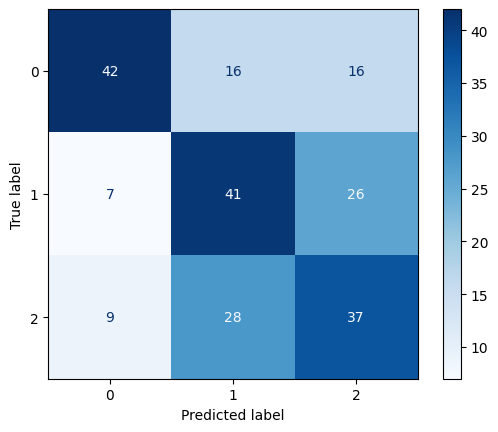

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

files_to_test = {
    # "sand": ["trial5.csv", "trial6.csv", "trial7.csv", "trial8.csv"],
    # "concrete": ["trial5.csv", "trial6.csv", "trial7.csv", "trial8.csv"],
    # "gravel": ["trial5.csv", "trial6.csv", "trial7.csv", "trial8.csv"],
    "sand":     ["trial8.csv",],
    "concrete": ["trial8.csv",],
    "gravel":   ["trial8.csv",],
    "clay":   ["trial8.csv",],
    "wood":   ["trial8.csv",],
}

test_data = {}
for key_ in files_to_test.keys():
    for file_ in files_to_test[key_]:
        test_data[os.path.join(parent_dir, 'data', key_, file_)] = key_
    
validation_classifier = SVMClassification(test_data)
validation_classifier.create_feature_matrix_and_label(normalize_data=norm_data,
                            legs=['fl', 'fr', 'rl', 'rr'], 
                            components=cmp,
                            combine_components=True, 
                            augment_data=aug_data,
                            data_padding_size=50,
                            augmetation_types=augment_types,
                            augment_params=params,
                            )

validation_classifier.feature_matrix, validation_classifier.labels = adjust_same_length(validation_classifier.feature_matrix, validation_classifier.labels)

validation_classifier.feature_matrix = scaler.transform(validation_classifier.feature_matrix)
validation_classifier.labels = convert_labels(validation_classifier.labels)

prediction_labels = good_model.predict(validation_classifier.feature_matrix)

print(f"classifification report:\n {classification_report(validation_classifier.labels, prediction_labels)}")
ConfusionMatrixDisplay.from_predictions(validation_classifier.labels, prediction_labels, display_labels=good_model.classes_, cmap='Blues')

In [10]:
# from joblib import dump
# from cuml.svm import SVC as cmSVC

# # from sklearn.externals import joblib

# new_svc = cmSVC(kernel='rbf', C=1, gamma=10, cache_size=2000)
# new_svc.fit(new_X_train, new_y_train)
# print("Training done")
# # sk_model = new_svc.to_sklearn()
# # dump(sk_model, os.path.join(parent_dir, 'svm_classification/cpu_test_model.joblib'))

In [11]:
# from joblib import load
# # import cuml
# from sklearn.metrics import classification_report
# loaded_model = load(os.path.join(parent_dir, 'svm_classification/models/trained_test_model.joblib'))
# print(f"loaded model {loaded_model}")

# predictions_ = loaded_model.predict(new_X_train)
# print(classification_report(orig_label_train, predictions_))
# # print(f"Accuracy: {accuracy_score(new_y_test, predictions_):.4f}")